# Introduction to Python for Machine Learning (v 2.0)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import os

## 2. Data Importation/Download

#### 2.1. Create Directories and URL

In [3]:
# Create url
url = 'http://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'

# variable to store file path
file_path = r'DataSets'

# variable to store file name
file_name = 'fuel_dataset.xlsx'

# variable to store file directory
file_directory = file_path+"\\"+file_name

# string variable to store sheet name
excel_sheet = 'DataSet'

# Create file directory
os.makedirs(os.path.dirname(file_directory), exist_ok=True)

#### 2.2. Import DataSet to Local directory

In [4]:
try: # try load from file
    raw_df = pd.read_excel(file_directory, excel_sheet)
    print("Fuel DataSet Loaded!")
except FileNotFoundError: 
    try: # try download data set from git repo
        raw_df = pd.read_csv(url)
        # Save to local storage
        raw_df.to_excel(file_directory, excel_sheet, index=False) 
        print("File downloaded!") 
    except OSError: 
        print('Network Connection Error!')

Fuel DataSet Loaded!


## 3. Data Exploration 
###### -> Here we would try to understand our dataset

#### 3.1. Display the data set

In [5]:
# Display first 4 rows
raw_df.head(4)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970


#### 3.2. Display dataset info

In [6]:
# Get data set info
raw_df.info(verbose=True, null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   record_id                     object 
 1   utility_id_ferc1              int64  
 2   report_year                   int64  
 3   plant_name_ferc1              object 
 4   fuel_type_code_pudl           object 
 5   fuel_unit                     object 
 6   fuel_qty_burned               int64  
 7   fuel_mmbtu_per_unit           float64
 8   fuel_cost_per_unit_burned     float64
 9   fuel_cost_per_unit_delivered  float64
 10  fuel_cost_per_mmbtu           float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


#### 3.3. Describe the data set to understand the relations, dependencies, frequencies and unique features

In [7]:
# describe dataset
raw_df.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2006_12_121_0_9,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


#### 3.4. Check Are there null values (how many)?

In [8]:
# Check for null values in dataset
raw_df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

#### 3.5. What correlations do this data set have?
###### -> This would enable us to understand how closely related some features are.

In [9]:
# Check data correlation
raw_df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [10]:
"""-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.
There is a huge disjoint here, why?"""

"-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.\nThere is a huge disjoint here, why?"

#### 3.6. What are the least and most correlated features in the data set?

In [11]:
# Check if there is any correlation between axis='fuel_cost_per_unit_delivered' 
# and axis='fuel_cost_per_unit_burned'
raw_df.corrwith(raw_df['fuel_cost_per_unit_delivered'])

utility_id_ferc1               -0.016414
report_year                    -0.014043
fuel_qty_burned                -0.003551
fuel_mmbtu_per_unit            -0.009039
fuel_cost_per_unit_burned       0.011007
fuel_cost_per_unit_delivered    1.000000
fuel_cost_per_mmbtu            -0.000109
dtype: float64

#### 3.7. Probability distribution density of the dataset (i.e using kurtosis() and skewness())

In [12]:
""" -> This would help in determining presence of outliers and column involved """

' -> This would help in determining presence of outliers and column involved '

In [13]:
# Check for the peak and tails of the dataset using pd.DataFrame().kurtosis()
# to determine the outliers in the dataset
raw_df.kurtosis()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [14]:
# Check for the peak and tails of the dataset using pd.DataFrame().sew()
# to determine the outliers in the dataset
raw_df.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

## 4. Data Cleaning and Data Wrangling

###### -> This is section is divided into Tasks:

#### 4.1. Task 1: Clean columns = 'plant_name_ferc1'

In [15]:
# display rows column = 'plant_name_ferc1' before cleaning
raw_df['plant_name_ferc1'].head(5) 

0                rockport
1    rockport total plant
2                  gorgas
3                   barry
4               chickasaw
Name: plant_name_ferc1, dtype: object

In [16]:
# function to remove characters such as #,*,(,),&,. from the strings & cluster them together which
# would improve uniqueness of the plant names
def clean_string(string):  
    return string.translate({ord(c): '' for c in '.#*$&()'}) 

In [17]:
# apply function to columns='plant_name_ferc1' to remove characters
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(lambda x: clean_string(x))

In [18]:
# check the first 10 words 
raw_df['plant_name_ferc1'].head(30)

0                 rockport
1     rockport total plant
2                   gorgas
3                    barry
4                chickasaw
5        e c gaston-unit 5
6          joseph m farley
7      resondent's portion
8     respondent's portion
9                units 1-3
10               units 1-3
11                  unit 4
12                  unit 4
13            clinch river
14            clinch river
15         amos-apco share
16              amos-total
17                glen lyn
18           kanawha river
19           kanawha river
20               mountainr
21               mountainr
22       philip sporn-apco
23       philip sporn-apco
24    philip sporn ttl plt
25    philip sporn ttl plt
26      cholla units 1,2,3
27      cholla units 1,2,3
28      cholla units 1,2,3
29               4 corners
Name: plant_name_ferc1, dtype: object

In [19]:
# check for key words like 'plant','total','power'
raw_df.loc[raw_df['plant_name_ferc1'].str.contains('plant|total|power', regex=True)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.580,18.530,1.12000
16,f1_fuel_1994_12_6_0_7,6,1994,amos-total,coal,ton,5327281,24.538,44.312,42.940,1.80600
89,f1_fuel_1994_12_12_0_11,12,1994,osage plant,coal,ton,205675,16.010,14.720,14.300,0.91900
90,f1_fuel_1994_12_12_0_14,12,1994,wyodak plant,coal,ton,391234,15.896,10.100,9.670,0.63500
173,f1_fuel_1994_12_44_0_2,44,1994,belle river total,coal,ton,4996518,18.706,27.620,27.620,1.47600
...,...,...,...,...,...,...,...,...,...,...,...
29475,f1_fuel_2018_12_193_1_1,193,2018,presque isle-total,coal,ton,1029238,18.024,42.557,42.557,2.36112
29476,f1_fuel_2018_12_193_1_5,193,2018,pt washington-total,gas,mcf,39905100,1.010,3.211,3.211,3.18960
29479,f1_fuel_2018_12_193_1_10,193,2018,so oak creek-total,coal,ton,2784916,17.568,36.526,36.526,2.07912
29480,f1_fuel_2018_12_193_1_12,193,2018,so oak creek-total,gas,mcf,358934,1.010,3.475,3.475,3.43815


In [20]:
# remove words such as 'plant','power','total' to improve uniqueness|similarity of plant names
def remove_substrings():
    x_strings = ['plant','power','total','ttl','plt']
    return lambda x: ' '.join([word for word in x.split() if word not in x_strings])

# apply to column = 'plant_name_ferc1'
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(remove_substrings())

In [21]:
# display first 5 rows in the column = 'plant_name_ferc1' after cleaning
raw_df['plant_name_ferc1'].head(50) 

0                 rockport
1                 rockport
2                   gorgas
3                    barry
4                chickasaw
5        e c gaston-unit 5
6          joseph m farley
7      resondent's portion
8     respondent's portion
9                units 1-3
10               units 1-3
11                  unit 4
12                  unit 4
13            clinch river
14            clinch river
15         amos-apco share
16              amos-total
17                glen lyn
18           kanawha river
19           kanawha river
20               mountainr
21               mountainr
22       philip sporn-apco
23       philip sporn-apco
24            philip sporn
25            philip sporn
26      cholla units 1,2,3
27      cholla units 1,2,3
28      cholla units 1,2,3
29               4 corners
30               4 corners
31               4 corners
32               4 corners
33             ocotillo 12
34        saguaro units 12
35        saguaro units 12
36                 yucca 1
3

#### 4.2. Task 2: Remove null values in column = 'fuel_unit'

In [22]:
#display first 5 rows of dataframe
raw_df.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [23]:
# display null values contained in the data set
raw_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [24]:
# check the number of occurence of each fuel unit grouped by fuel types
raw_df.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

###### -> Select the most frequent fuel unit in each group

In [25]:
# create variables of list and dataframe types
fuel_unit_list = []
fuel_type_df   = pd.DataFrame()

# store the unique fuel types as a list
fuel_type_list = raw_df['fuel_type_code_pudl'].unique()

# loop through the fuel types and append to selected fuel units in each group  
# Please note: these fuel units where selected by their frequency|count of appearance. the 
# most occurring are the selected units to be taken.
for fuel_type in fuel_type_list:
    fuel_unit_list.append(raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type,'fuel_unit'].mode())

# fill the dataframe 'fuel_type_df' with the fuel_type_list and fuel_unit_list   
fuel_type_df['Fuel Types'] = fuel_type_list
fuel_type_df['Fuel Units'] = pd.DataFrame(fuel_unit_list)
fuel_type_df

,Fuel Types,Fuel Units
0,coal,ton
1,gas,mcf
2,nuclear,gramsU
3,oil,bbl
4,waste,ton
5,other,ton


In [26]:
# remove null values from axis='fuel_unit' by grouping axis='fuel_type_code_pudl'
for index,fuel_type in fuel_type_df.iterrows():
    raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'] = raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'].fillna(value=fuel_type['Fuel Units'])

raw_df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

#### 4.3. Task 3: Fill the rows containing '0' in axis='fuel_cost_per_unit_delivered'

In [27]:
# Mask all the values in column = 'fuel_per_unit_cost_delivered' containing zero 
# value with the relative value on column = 'fuel_per_unit_cost_burned'
df1 = raw_df['fuel_cost_per_unit_delivered']
df2 = raw_df['fuel_cost_per_unit_burned']

raw_df['fuel_cost_per_unit_delivered'] = df1.mask(df1==0, df2)

In [28]:
raw_df['fuel_cost_per_unit_delivered'].head(50)

0       18.530
1       18.530
2       38.120
3       45.990
4        2.770
5       43.250
6       28.770
7       55.130
8       34.650
9       28.110
10       1.940
11      28.110
12       1.940
13      29.019
14      23.444
15      42.915
16      42.940
17      32.893
18      42.034
19      26.280
20      38.717
21      23.884
22      35.856
23      30.508
24      35.793
25      30.507
26      31.200
27      28.730
28       2.480
29      20.860
30       2.690
31      21.050
32       2.980
33       2.170
34      32.060
35       2.200
36      39.140
37       2.380
38      23.640
39       2.290
40      28.080
41       2.530
42       2.210
43      52.150
44       1.920
45    1550.000
46      22.520
47       2.290
48      43.550
49      34.180
Name: fuel_cost_per_unit_delivered, dtype: float64

#### 4.4. Task 4: Convert all zero values on column = 9 and 10 to null values. 

In [29]:
# Mask all the values in column = 'fuel_per_unit_cost_delivered' containing zero 
# value with the relative value on column = 'fuel_per_unit_cost_burned'
df1 = raw_df['fuel_cost_per_unit_burned'] 
df2 = raw_df['fuel_cost_per_unit_delivered']

raw_df['fuel_cost_per_unit_burned']    = df1.mask(df1==0, np.nan)
raw_df['fuel_cost_per_unit_delivered'] = df2.mask(df2==0, np.nan)

# display the null values of of the two columns
raw_df.iloc[:,8:10].isna().sum()

fuel_cost_per_unit_burned       288
fuel_cost_per_unit_delivered    224
dtype: int64

#### 4.5. Task 5: Drop all rows containing null values and reset the index of the dataframe

In [30]:
# display the null values of of the two columns
raw_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                         0
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned       288
fuel_cost_per_unit_delivered    224
fuel_cost_per_mmbtu               0
dtype: int64

In [31]:
# drop null values and reset index
raw_df.dropna(inplace=True)

In [32]:
# display the null values of of the two columns
raw_df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [33]:
raw_df.head(60)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e c gaston-unit 5,coal,ton,2124933,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m farley,nuclear,kgU,2260,0.064094,28.770,28.770,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233,22.484000,28.730,28.110,1.278


In [34]:
raw_df.reset_index(drop=False,inplace=True)

In [35]:
# Save modified dataframe to file
raw_df.to_excel(file_path+"\\"+'Modified_1.xlsx','Modified sheet',index=False)

#### 4.6. Task 6: Remove outliers from the dataset

In [36]:
raw_df =pd.read_excel(file_path+"\\"+'Modified_1.xlsx','Modified sheet')
raw_df.describe()

,index,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29235.000000,29235.000000,29235.000000,2.923500e+04,29235.000000,29235.000000,2.923500e+04,29235.000000
mean,14784.595109,118.688524,2005.824902,2.640041e+06,8.406558,210.704476,9.864791e+02,19.424591
std,8521.209346,74.261101,7.024242,9.155425e+06,9.957657,2868.440702,6.913198e+04,2101.817523
min,0.000000,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,7417.500000,55.000000,2000.000000,1.393300e+04,1.024000,5.345500,5.220000e+00,1.960000
50%,14779.000000,122.000000,2006.000000,2.556850e+05,5.763114,26.490000,2.542300e+01,4.139000
75%,22169.000000,176.000000,2012.000000,1.434886e+06,17.024667,47.452000,4.754050e+01,7.709000
max,29521.000000,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [37]:
def plot_scatter():
    sns.scatterplot(x='fuel_cost_per_unit_burned',y='fuel_qty_burned',hue='fuel_unit',data=raw_df) 
    plt.show()

In [38]:
# import library
from scipy import stats

# function to drop
def drop_outliers(df, z_thresh=100):
    # constraints would containt True or False depending on if it is a value below the 
    # threshold.
    constrains = df.select_dtypes(include=[np.number])\
    .apply(lambda x: np.abs(stats.zscore(x))< z_thresh, result_type='reduce').all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains],inplace=True)

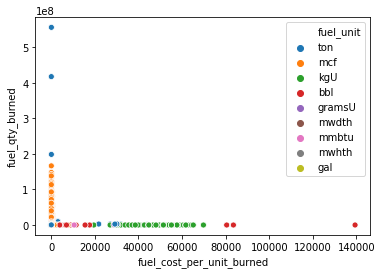

In [39]:
# show data distribution
plot_scatter()

In [40]:
# Save modified dataframe to file
raw_df.to_excel(file_path+"\\"+'Modified_fuel_dataset.xlsx','Modified sheet',index=False)

## 5. Data Visualization

#### 5.1. What is the cost of fuel burnt and delivered?

In [41]:
"""From the dataset given, we can't calculate the cost of fuel delivered since we do not know the quantity that was actually delivered. Quantity given was for fuel burnt. Hence, we would work with the quantity burnt to derive the cost of burnt fuel and how much energy this yeilded."""

"From the dataset given, we can't calculate the cost of fuel delivered since we do not know the quantity that was actually delivered. Quantity given was for fuel burnt. Hence, we would work with the quantity burnt to derive the cost of burnt fuel and how much energy this yeilded."

##### 5.1.1. Drop irrelevant columns to reduce data size

In [42]:
raw_df.drop(columns =['fuel_cost_per_unit_delivered'],axis=1,inplace=True)
raw_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570


##### 5.1.2. Augument dataframe with extra columns for analysis

In [43]:
raw_df['fuel_cost_burned'] = raw_df['fuel_qty_burned'] * raw_df['fuel_cost_per_unit_burned']
raw_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05


In [44]:
raw_df.head(3)

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08


In [45]:
raw_df['fuel_mmbtu_qty_burned'] = raw_df['fuel_qty_burned'] * raw_df['fuel_mmbtu_per_unit']
raw_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07,8.921254e+07
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08,1.739994e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08,7.187562e+07
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08,8.956064e+07
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05,4.053300e+04


In [46]:
raw_df['fuel_mmbtu_cost_burned'] = raw_df['fuel_mmbtu_qty_burned'] * raw_df['fuel_cost_per_mmbtu']
raw_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned,fuel_mmbtu_cost_burned
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07,8.921254e+07,1.000073e+08
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08,1.739994e+08,1.948793e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08,7.187562e+07,1.185948e+08
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08,8.956064e+07,1.764345e+08
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05,4.053300e+04,1.041698e+05


In [47]:
raw_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned,fuel_mmbtu_cost_burned
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07,8.921254e+07,1.000073e+08
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08,1.739994e+08,1.948793e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08,7.187562e+07,1.185948e+08
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08,8.956064e+07,1.764345e+08
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05,4.053300e+04,1.041698e+05


In [48]:
raw_df.drop(columns = ['index'], inplace = True)
raw_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned,fuel_mmbtu_cost_burned
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07,8.921254e+07,1.000073e+08
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08,1.739994e+08,1.948793e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08,7.187562e+07,1.185948e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08,8.956064e+07,1.764345e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05,4.053300e+04,1.041698e+05


In [49]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   record_id                  29235 non-null  object 
 1   utility_id_ferc1           29235 non-null  int64  
 2   report_year                29235 non-null  int64  
 3   plant_name_ferc1           29227 non-null  object 
 4   fuel_type_code_pudl        29235 non-null  object 
 5   fuel_unit                  29235 non-null  object 
 6   fuel_qty_burned            29235 non-null  int64  
 7   fuel_mmbtu_per_unit        29235 non-null  float64
 8   fuel_cost_per_unit_burned  29235 non-null  float64
 9   fuel_cost_per_mmbtu        29235 non-null  float64
 10  fuel_cost_burned           29235 non-null  float64
 11  fuel_mmbtu_qty_burned      29235 non-null  float64
 12  fuel_mmbtu_cost_burned     29235 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usag

In [50]:
raw_df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned,fuel_mmbtu_cost_burned
count,29235.000000,29235.000000,2.923500e+04,29235.000000,29235.000000,29235.000000,2.923500e+04,2.923500e+04,2.923500e+04
mean,118.688524,2005.824902,2.640041e+06,8.406558,210.704476,19.424591,6.533037e+07,1.441194e+07,3.016551e+07
std,74.261101,7.024242,9.155425e+06,9.957657,2868.440702,2101.817523,1.274410e+09,1.028887e+08,1.513583e+08
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-41.501000,-2.111377e+06,6.000000e-05,-1.199547e+04
25%,55.000000,2000.000000,1.393300e+04,1.024000,5.345500,1.960000,3.151002e+05,3.475558e+04,2.531087e+05
50%,122.000000,2006.000000,2.556850e+05,5.763114,26.490000,4.139000,3.301823e+06,4.911918e+05,2.809848e+06
75%,176.000000,2012.000000,1.434886e+06,17.024667,47.452000,7.709000,2.851415e+07,1.255980e+07,2.709103e+07
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,359278.000000,9.280174e+10,1.284783e+10,1.892485e+10


##### plot the best performing year

In [51]:
result = raw_df.groupby('report_year').mean()

In [54]:
def draw_twinbarplot(xA,xB,y,
                     xlabel,legendA,legendB,
                     title_label):
    x_value  = np.array(y)
    width    = 0.40 # the width of the bars

    fig, ax = plt.subplots()
    rects1  = ax.bar(x_value-width/2, xA, width)
    rects2  = ax.bar(x_value+width/2, xB, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(legendA)
    ax.set_xlabel(xlabel)
    
    secay = ax.secondary_yaxis('right')
    secay.set_ylabel(legendB)
    
    ax.set_title(title_label)
    
    ax.set_xticks(x_value)
    ax.tick_params('x', labelrotation=90)
    ax.legend((rects1,rects2),(legendA,legendB),fontsize='x-small')
    ax.grid()

    fig.tight_layout()
    fig.savefig(file_path+"\\"+title_label+".png")
    plt.show()

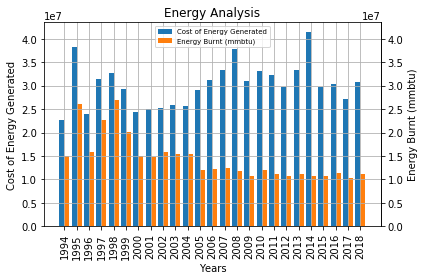

In [55]:
years        = raw_df['report_year'].unique()
energy_cost  = result['fuel_mmbtu_cost_burned']
energy_burnt = result['fuel_mmbtu_qty_burned']
legendA      = str('Cost of Energy Generated')
legendB      = str('Energy Burnt (mmbtu)')
x_label      = 'Years'
title        = 'Energy Analysis' 

draw_twinbarplot(energy_cost,
                 energy_burnt,years,
                 x_label,legendA,legendB,title)

In [ ]:
years              = raw_df['report_year'].unique()
fuel_burnt         = result['fuel_qty_burned']
energy_generated   = result['fuel_mmbtu_qty_burned']
legendA            = str('Fuel Consumed')
legendB            = str('Energy Generated (mmbtu)') 
x_label            = 'Years'
title              = 'Fuel Consumption Analysis' 

print(years.shape())
#draw_twinbarplot(fuel_burnt, energy_generated,years, x_label,legendA,legendB,title)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu,fuel_cost_burned,fuel_mmbtu_qty_burned,fuel_mmbtu_cost_burned,Period
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,1.121,9.996752e+07,8.921254e+07,1.000073e+08,7
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,1.120,1.948474e+08,1.739994e+08,1.948793e+08,10
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,1.650,1.183133e+08,7.187562e+07,1.185948e+08,1
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,1.970,1.765410e+08,8.956064e+07,1.764345e+08,7
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.570,1.122764e+05,4.053300e+04,1.041698e+05,10


##### What utitility had the consummed the hightest fuel

In [ ]:
What

#### Which plant is the most efficient?

#### Which utilities are the best and worst performing

#### Which of the fuels are the most economical and efficient

#### What year was the best performing year independent of the cost of fuel per mmbtu?

#### What factors where responsible for the outstanding performance in question --- above?

#### Seeing the above what are your recommendations?